In [ ]:
# submission by Akshunn Garg 23/CS/042

In [ ]:
# data.py

import pandas as pd
import numpy as np

def load_iris():
    iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    iris = pd.read_csv(iris_url, header=None, names=iris_cols)

    X = iris.iloc[:, :-1].to_numpy()
    
    # Remove 'Iris-' prefix from species names
    y = iris['species'].str.replace("Iris-", "", regex=False).to_numpy()
    
    return X, y

def load_wine():
    wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    wine_cols = ['class'] + [f'feature_{i}' for i in range(13)]
    wine = pd.read_csv(wine_url, header=None, names=wine_cols)
    
    X = wine.iloc[:, 1:].to_numpy()
    y = wine['class'].to_numpy()
    
    return X, y


In [21]:
# Cell 2: utils.py

import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


In [22]:
# Cell 3: knn_classifier.py

import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])


In [23]:
# Cell 4: eda

import matplotlib.pyplot as plt
import numpy as np

def plot_iris_features(X, y, feature_names):
    species = np.unique(y)
    features = X.shape[1]
    
    plt.figure(figsize=(12, 10))
    plot_num = 1
    for i in range(features):
        for j in range(i+1, features):
            plt.subplot(3, 2, plot_num)
            for sp in species:
                plt.scatter(X[y==sp, i], X[y==sp, j], label=sp)
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{feature_names[i]} vs {feature_names[j]}')
            plt.legend()
            plot_num += 1
    plt.tight_layout()
    plt.show()


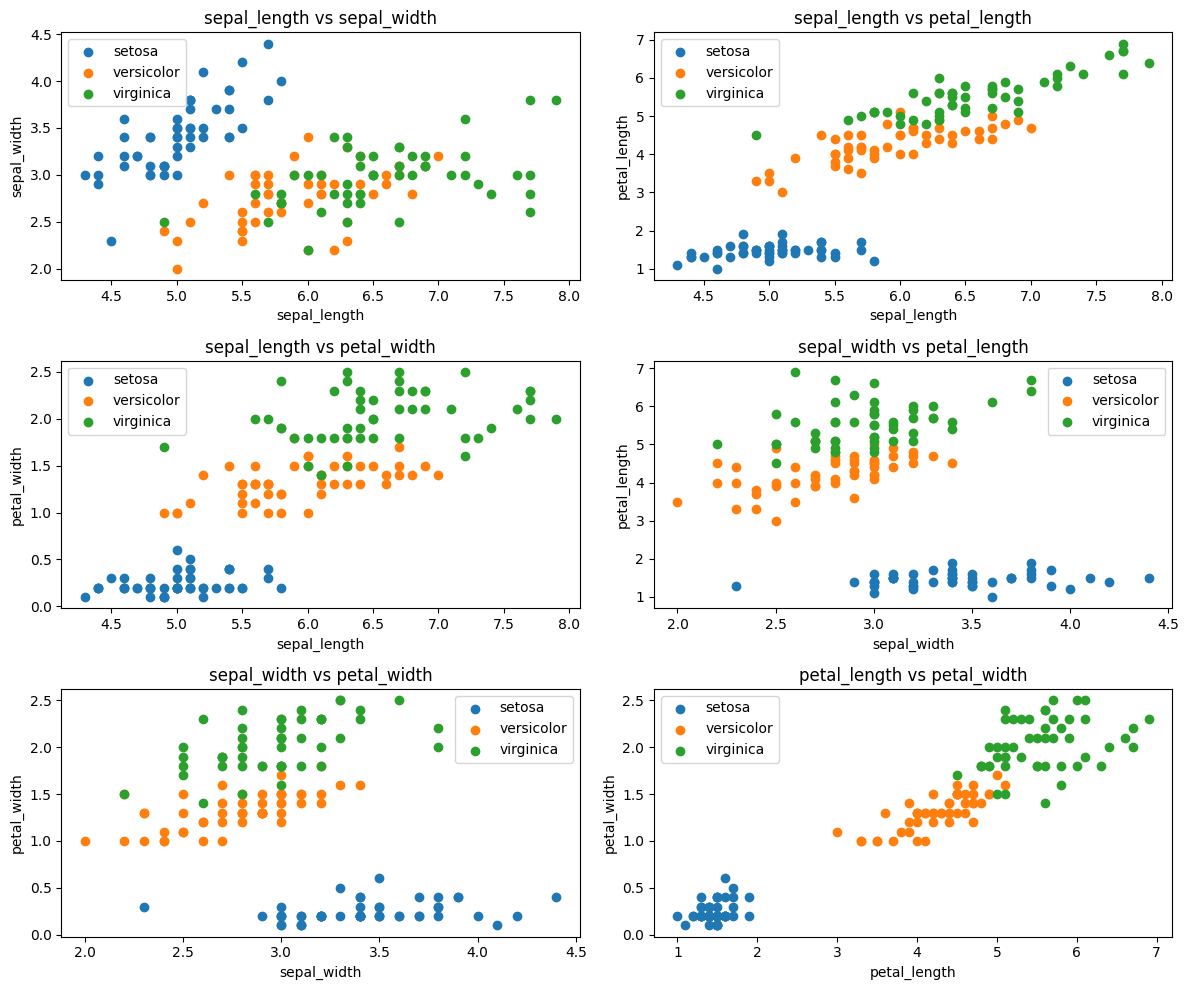

k=1, Accuracy=0.97
k=3, Accuracy=0.97
k=5, Accuracy=0.97
k=7, Accuracy=0.97
k=9, Accuracy=0.97
k=11, Accuracy=0.97
k=15, Accuracy=0.97


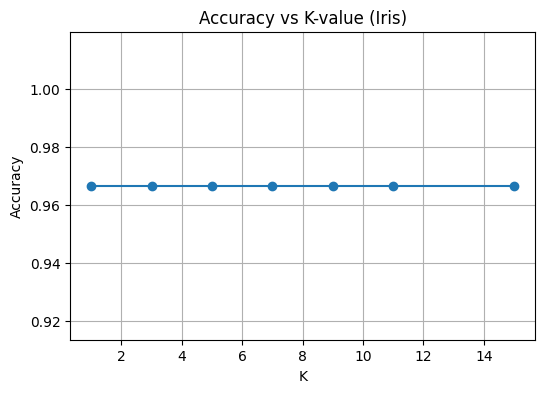

Best k for Iris: 1
Wine Dataset Accuracy: 0.7222222222222222


In [24]:
# Cell 5: main.py

# Load Iris dataset
X_iris, y_iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# EDA
plot_iris_features(X_iris, y_iris, feature_names)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Hyperparameter Tuning
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)
    print(f"k={k}, Accuracy={accuracy:.2f}")

# Plot Accuracy vs K
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K-value (Iris)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best k for Iris:", best_k)

# Wine Dataset Evaluation
X_wine, y_wine = load_wine()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

knn_wine = KNNClassifier(k=best_k)
knn_wine.fit(X_train_w, y_train_w)
y_pred_w = knn_wine.predict(X_test_w)
accuracy_wine = np.sum(y_pred_w == y_test_w) / len(y_test_w)
print("Wine Dataset Accuracy:", accuracy_wine)
